In [4]:
import cenpy as cp
from cenpy import products
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

acs = cp.products.ACS()

/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
#Converting the CSV files into dataframes
col_index = [i for i in range(29)] + [i for i in range(41, 50)] + [70, 71, 72]
df = pd.read_csv('ev_data.csv', usecols=[i for i in col_index], dtype={'zip': str, 'ev_network_web': str, 'ev_renewable_source': str, 'ev_other_evse': str, 'ev_workplace_charging': str}) 
sdge_areas = pd.read_csv('SDGE_service_list.csv', usecols=['ZipCode'])

#Getting the zip codes for all the areas at SDGE serves
sdge_zip_codes = [str(element) for element in sdge_areas['ZipCode'].unique()]

#Querying the data to only include chargers within the areas that SDGE serves
df = df[df['zip'].isin(sdge_zip_codes)]
df

,station_name,access_code,access_days_time,access_detail_code,cards_accepted,date_last_confirmed,expected_date,fuel_type_code,groups_with_access_code,id,...,ev_level2_evse_num,ev_network,ev_network_web,ev_other_evse,ev_pricing,ev_renewable_source,ev_workplace_charging,groups_with_access_code_fr,ev_pricing_fr,ev_network_ids
9,Scripps Green Hospital,public,24 hours daily,NaN,NaN,2024-08-15,NaN,ELEC,Public,6355,...,1.0,Non-Networked,NaN,NaN,Free; parking fee,NaN,False,Public,NaN,NaN
128,Mossy Nissan - El Cajon,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39886,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
131,Mossy Nissan - Escondido,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39889,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
155,Mossy Nissan,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39915,...,1.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
156,Mossy Nissan - Oceanside,public,Dealership business hours,CALL,NaN,2024-02-12,NaN,ELEC,Public - Call ahead,39916,...,2.0,Non-Networked,NaN,NaN,Free,NaN,False,Public - Appeler à l'avance,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18447,SKYLINE C.A. STATION 1,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,355493,...,1.0,ChargePoint Network,http://www.chargepoint.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['USCPIL9013211'], 'posts': ['1588..."
18448,SKYLINE C.A. STATION 2,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,355494,...,1.0,ChargePoint Network,http://www.chargepoint.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['USCPIL9013261'], 'posts': ['1588..."
18526,El Norte Broadway Center - Escondido,public,24 hours daily,NaN,NaN,2024-10-14,NaN,ELEC,Public,356127,...,NaN,eVgo Network,https://www.evgo.com/,NaN,NaN,NaN,False,Public,NaN,"{'station': ['69576'], 'posts': ['149507', '14..."
18532,Boardwalk Condos,public,9am-5pm M-F,NaN,A ACCOUNT_BALANCE CREDIT D Debit M V,2024-10-11,NaN,ELEC,Public,356216,...,4.0,EVMATCH,https://www.evmatch.com,NaN,NaN,NaN,False,Public,NaN,NaN


In [6]:
#Getting the income census data
sd_income_df = products.ACS(2019).from_county('San Diego, CA', level = 'tract', variables = 'B06011_001E')
oc_income_df = products.ACS(2019).from_county('Orange County, CA', level = 'tract', variables = 'B06011_001E')

income_df = pd.concat([sd_income_df, oc_income_df])
income_df.rename(columns={'B06011_001E': 'Median Income'}, inplace = True)
income_df = income_df.to_crs(epsg=4326)
income_df

/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,Median Income,NAME,state,county,tract
0,06073010012,"POLYGON ((-117.06244 32.56008, -117.06242 32.5...",23470.0,"Census Tract 100.12, San Diego County, California",06,073,010012
1,06073010009,"POLYGON ((-117.07110 32.54323, -117.07110 32.5...",21325.0,"Census Tract 100.09, San Diego County, California",06,073,010009
2,06073018609,"POLYGON ((-117.32272 33.25034, -117.32271 33.2...",27630.0,"Census Tract 186.09, San Diego County, California",06,073,018609
3,06073017813,"POLYGON ((-117.34553 33.14438, -117.34480 33.1...",48841.0,"Census Tract 178.13, San Diego County, California",06,073,017813
4,06073017701,"POLYGON ((-117.31582 33.08819, -117.31487 33.0...",52232.0,"Census Tract 177.01, San Diego County, California",06,073,017701
...,...,...,...,...,...,...,...
578,06059032012,"POLYGON ((-117.67634 33.59812, -117.67628 33.5...",44208.0,"Census Tract 320.12, Orange County, California",06,059,032012
579,06059032003,"POLYGON ((-117.68130 33.61342, -117.68098 33.6...",49890.0,"Census Tract 320.03, Orange County, California",06,059,032003
580,06059042312,"POLYGON ((-117.67302 33.51790, -117.67294 33.5...",24134.0,"Census Tract 423.12, Orange County, California",06,059,042312
581,06059052428,"POLYGON ((-117.64523 33.67651, -117.64494 33.6...",65948.0,"Census Tract 524.28, Orange County, California",06,059,052428


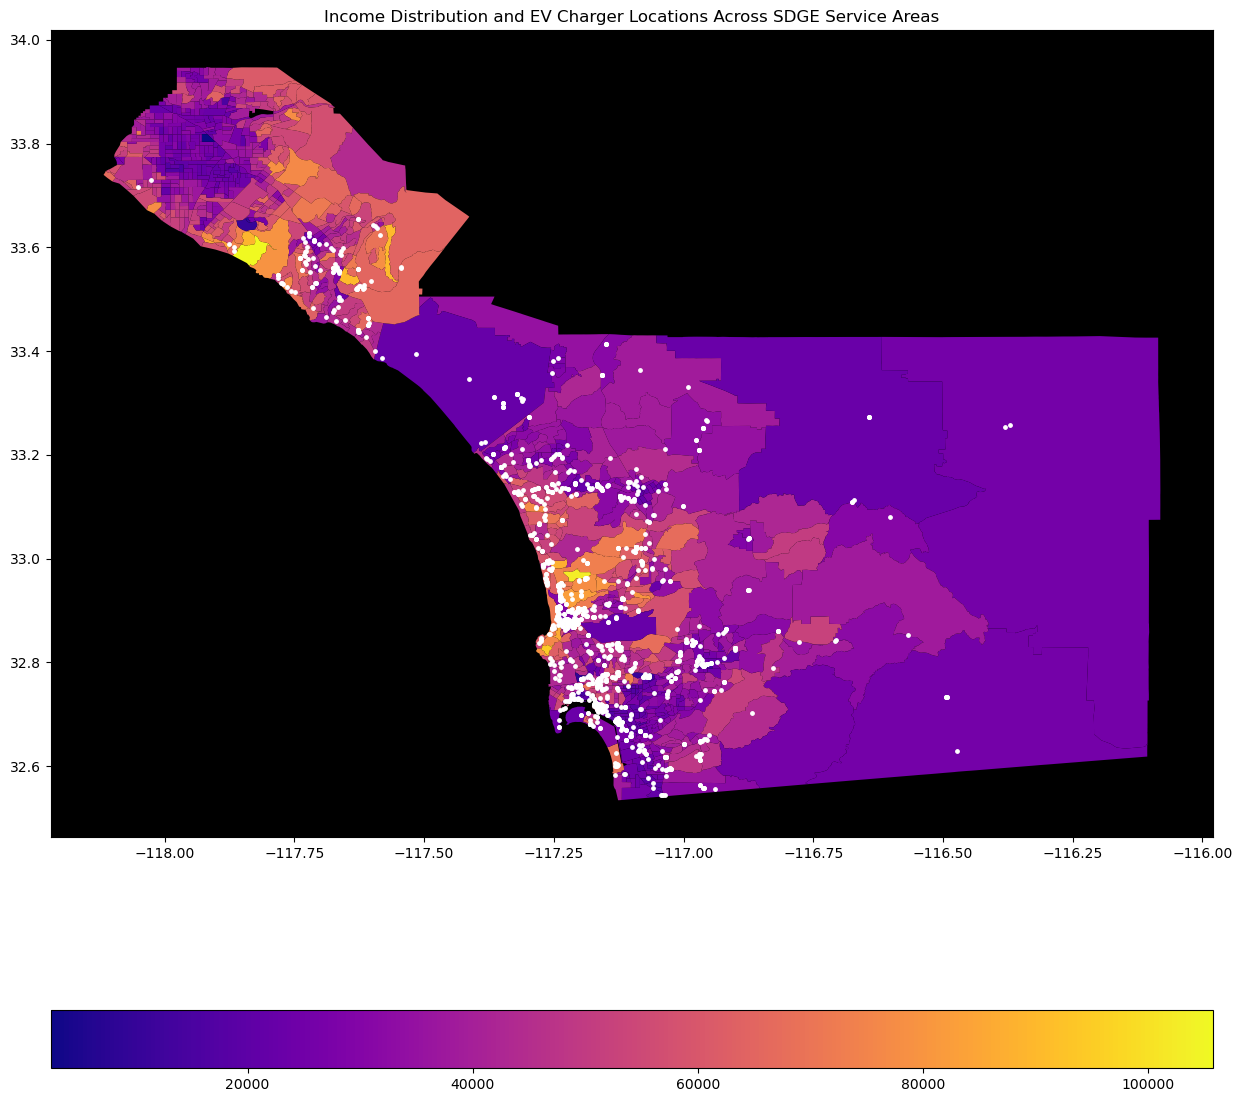

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax = income_df.plot('Median Income', ax=ax, cmap='plasma', legend=True, legend_kwds={'orientation': 'horizontal'})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

ax.set_facecolor('k')
gdf.plot(ax=ax, color='white', markersize=6)
plt.title('Income Distribution and EV Charger Locations Across SDGE Service Areas');
plt.show()

In [8]:
#Getting the population census data
sd_pop_df = products.ACS(2019).from_county('San Diego, CA', level = 'tract', variables = 'B01003_001E')
oc_pop_df = products.ACS(2019).from_county('Orange County, CA', level = 'tract', variables = 'B01003_001E')

pop_df = pd.concat([sd_pop_df, oc_pop_df])
pop_df.rename(columns={'B01003_001E': 'Population'}, inplace = True)
pop_df = pop_df.to_crs(epsg=4326)
pop_df

/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,Population,NAME,state,county,tract
0,06073010012,"POLYGON ((-117.06244 32.56008, -117.06242 32.5...",5199.0,"Census Tract 100.12, San Diego County, California",06,073,010012
1,06073010009,"POLYGON ((-117.07110 32.54323, -117.07110 32.5...",6978.0,"Census Tract 100.09, San Diego County, California",06,073,010009
2,06073018609,"POLYGON ((-117.32272 33.25034, -117.32271 33.2...",6437.0,"Census Tract 186.09, San Diego County, California",06,073,018609
3,06073017813,"POLYGON ((-117.34553 33.14438, -117.34480 33.1...",4018.0,"Census Tract 178.13, San Diego County, California",06,073,017813
4,06073017701,"POLYGON ((-117.31582 33.08819, -117.31487 33.0...",5141.0,"Census Tract 177.01, San Diego County, California",06,073,017701
...,...,...,...,...,...,...,...
578,06059032012,"POLYGON ((-117.67634 33.59812, -117.67628 33.5...",4104.0,"Census Tract 320.12, Orange County, California",06,059,032012
579,06059032003,"POLYGON ((-117.68130 33.61342, -117.68098 33.6...",4824.0,"Census Tract 320.03, Orange County, California",06,059,032003
580,06059042312,"POLYGON ((-117.67302 33.51790, -117.67294 33.5...",9752.0,"Census Tract 423.12, Orange County, California",06,059,042312
581,06059052428,"POLYGON ((-117.64523 33.67651, -117.64494 33.6...",6359.0,"Census Tract 524.28, Orange County, California",06,059,052428


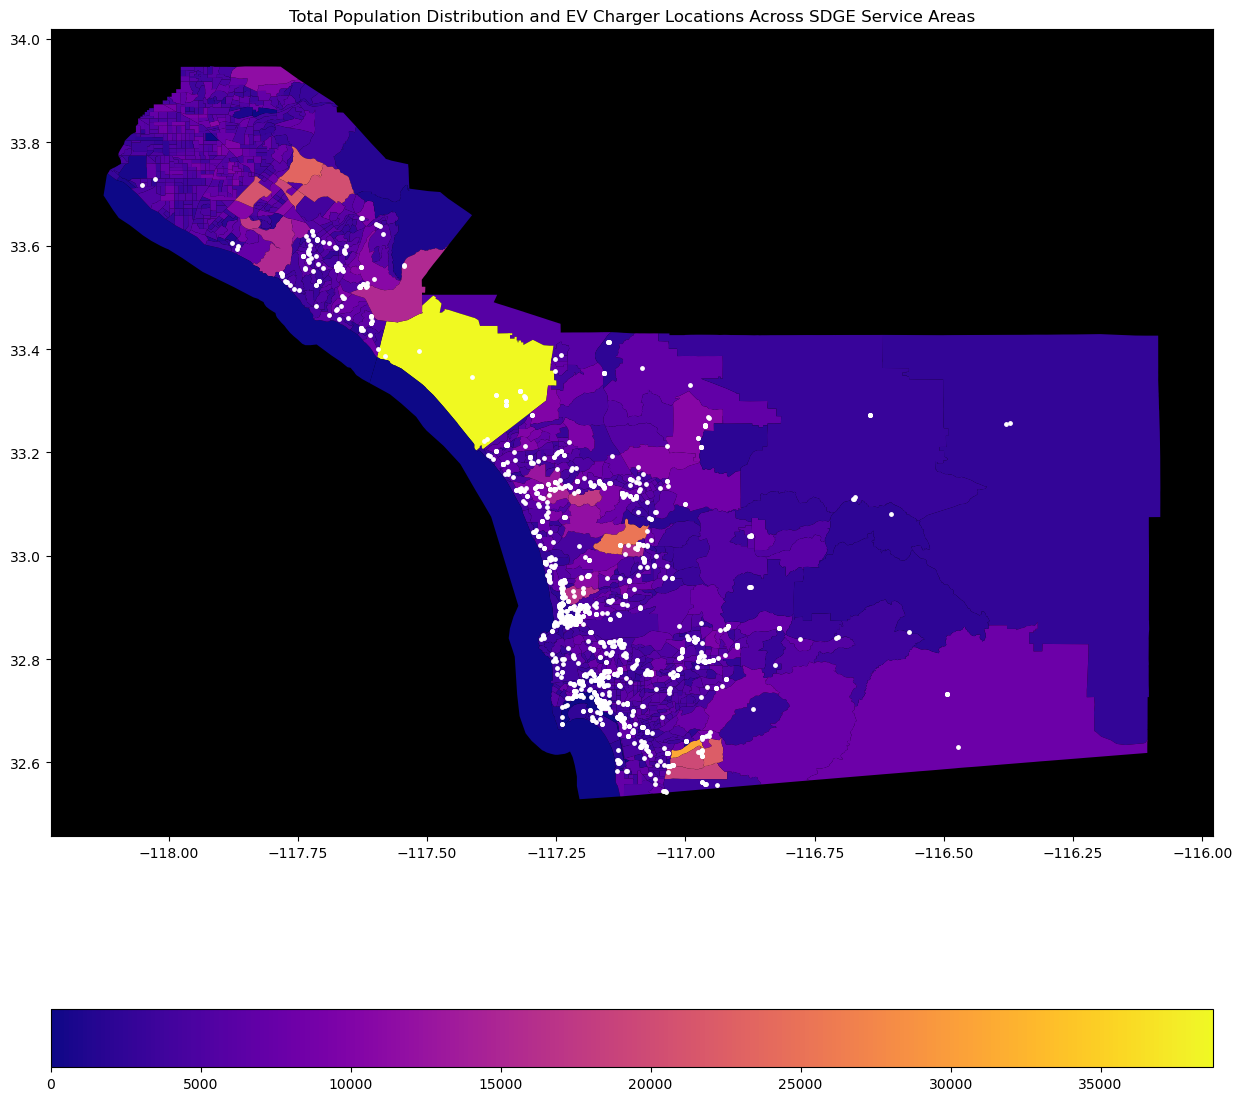

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
ax = pop_df.plot('Population', ax=ax, cmap='plasma', legend=True, legend_kwds={'orientation': 'horizontal'})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

ax.set_facecolor('k')
gdf.plot(ax=ax, color='white', markersize=6)
plt.title('Total Population Distribution and EV Charger Locations Across SDGE Service Areas');
plt.show()

In [10]:
#Getting the number of commuting vehicle census data
sd_com_df = products.ACS(2019).from_county('San Diego, CA', level = 'tract', variables = 'B08015_001E')
oc_com_df = products.ACS(2019).from_county('Orange County, CA', level = 'tract', variables = 'B08015_001E')

com_df = pd.concat([sd_com_df, oc_com_df])
com_df.rename(columns={'B08015_001E': 'Commuting Vehicles'}, inplace = True)
com_df = com_df.to_crs(epsg=4326)
com_df

/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)
/Users/vanessah/opt/anaconda3/lib/python3.9/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,Commuting Vehicles,NAME,state,county,tract
0,06073010012,"POLYGON ((-117.06244 32.56008, -117.06242 32.5...",1725.0,"Census Tract 100.12, San Diego County, California",06,073,010012
1,06073010009,"POLYGON ((-117.07110 32.54323, -117.07110 32.5...",2345.0,"Census Tract 100.09, San Diego County, California",06,073,010009
2,06073018609,"POLYGON ((-117.32272 33.25034, -117.32271 33.2...",2870.0,"Census Tract 186.09, San Diego County, California",06,073,018609
3,06073017813,"POLYGON ((-117.34553 33.14438, -117.34480 33.1...",1180.0,"Census Tract 178.13, San Diego County, California",06,073,017813
4,06073017701,"POLYGON ((-117.31582 33.08819, -117.31487 33.0...",1970.0,"Census Tract 177.01, San Diego County, California",06,073,017701
...,...,...,...,...,...,...,...
578,06059032012,"POLYGON ((-117.67634 33.59812, -117.67628 33.5...",1610.0,"Census Tract 320.12, Orange County, California",06,059,032012
579,06059032003,"POLYGON ((-117.68130 33.61342, -117.68098 33.6...",1890.0,"Census Tract 320.03, Orange County, California",06,059,032003
580,06059042312,"POLYGON ((-117.67302 33.51790, -117.67294 33.5...",3440.0,"Census Tract 423.12, Orange County, California",06,059,042312
581,06059052428,"POLYGON ((-117.64523 33.67651, -117.64494 33.6...",3060.0,"Census Tract 524.28, Orange County, California",06,059,052428


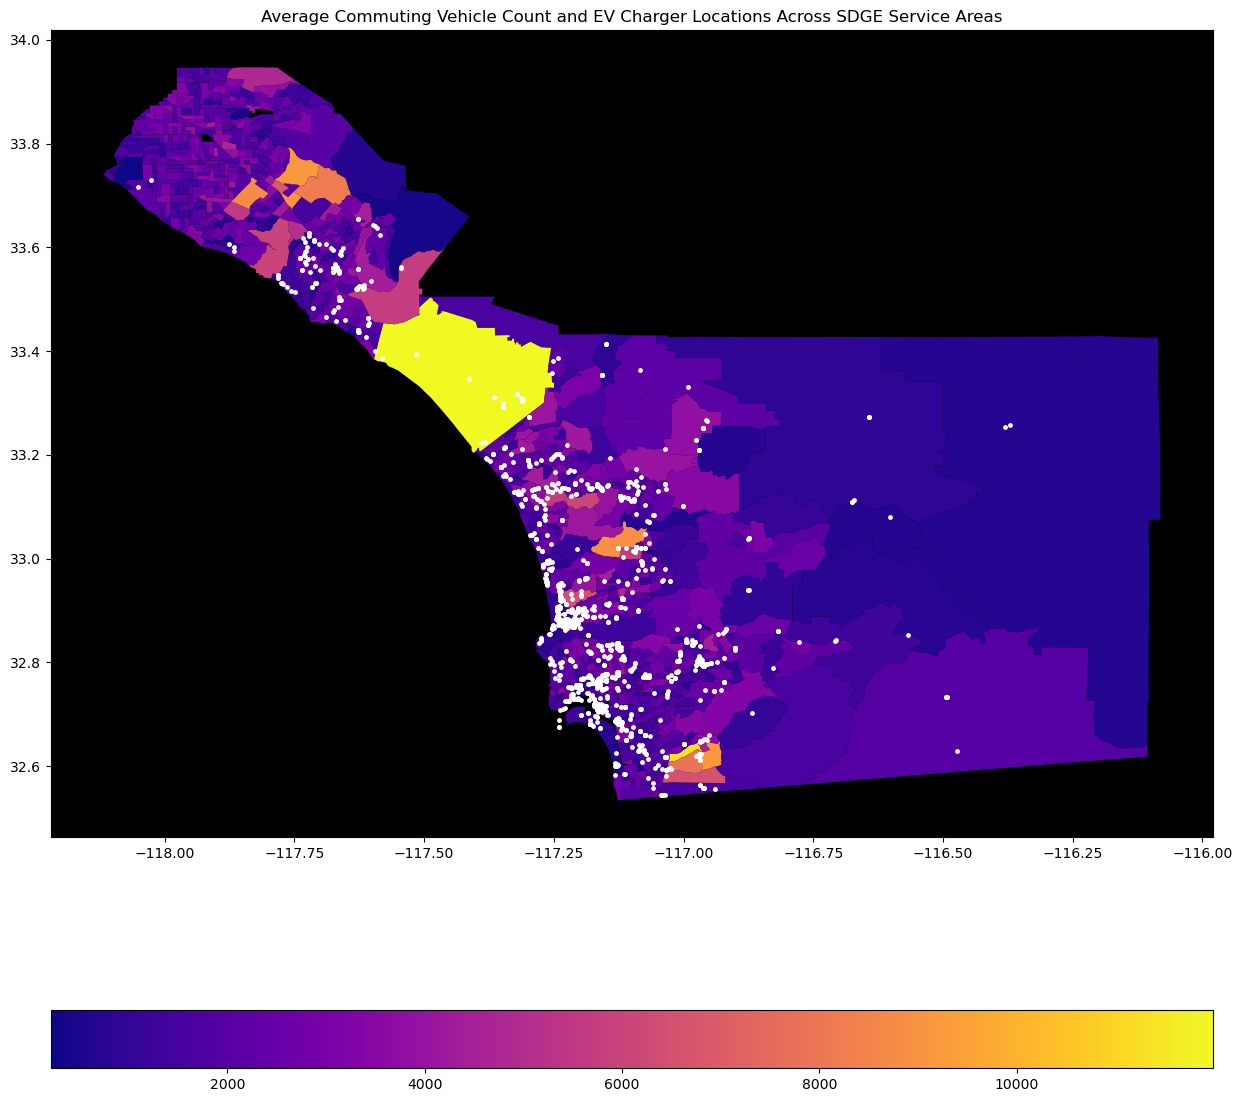

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
ax = com_df.plot('Commuting Vehicles', ax=ax, cmap='plasma', legend=True, legend_kwds={'orientation': 'horizontal'})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

ax.set_facecolor('k')
gdf.plot(ax=ax, color='white', markersize=6)
plt.title('Average Commuting Vehicle Count and EV Charger Locations Across SDGE Service Areas');
plt.show()